In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
# read excel data
def read_excel_data(excel_file):
    df = pd.read_csv(excel_file)
    return df
df = read_excel_data('Dataset-vf.csv')

In [3]:
df.head()

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,X11,X12,X15,X13,X14,Y
0,43,59.0,11,120,150,2709,2114,228,217,120,0.66,269,R1,FC11,CA49,BMW
1,0,54.0,7,0,693,2802,162,224,225,136,0.35,195,NaN,FC11,CA50,BMW
2,0,28.0,12,0,1260,2325,162,215,213,133,0.89,750,NaN,FC14,CA26,Mercedes
3,16,112.0,8,272,3649,2837,6221,235,231,128,0.27,-155,NaN,FC11,CA32,Ford
4,10,59.0,7,134,900,2509,5184,226,226,134,0.93,88,NaN,FC11,CA38,BMW


In [4]:
#report numerical data
display(df.describe(include=[np.number]))

#check for null values
display(df.isnull().sum())


,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,X11,X12
count,6124.000000,5520.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000,6124.000000
mean,47.550621,151.293659,16.794579,192.488080,1541.308459,2645.712933,1442.194154,216.777106,218.770411,129.345852,0.493588,6.209993
std,57.465790,103.437461,8.995704,179.689943,1296.494523,393.799727,1123.945559,30.475508,23.550070,48.693500,0.290903,573.410551
min,-134.000000,0.000000,0.000000,0.000000,0.000000,1903.000000,30.000000,59.000000,99.000000,0.000000,0.000000,-1000.000000
25%,2.000000,71.000000,10.000000,42.000000,636.000000,2287.000000,663.000000,202.000000,207.000000,97.000000,0.240000,-492.250000
50%,27.000000,122.000000,15.000000,150.000000,1158.000000,2699.000000,1189.000000,224.000000,223.000000,134.000000,0.490000,21.000000
75%,77.000000,230.250000,23.000000,295.000000,2010.500000,2939.250000,1879.000000,239.000000,236.000000,163.000000,0.750000,495.000000
max,334.000000,359.000000,49.000000,1129.000000,6890.000000,3675.000000,6853.000000,254.000000,254.000000,248.000000,1.000000,1000.000000


X5        0
X2      604
X3        0
X4        0
X6        0
X1        0
X10       0
X7        0
X8        0
X9        0
X11       0
X12       0
X15    5523
X13       0
X14       0
Y         0
dtype: int64

In [5]:
print(df['X15'].value_counts())
print(df.shape)

R3    229
R2    190
R1    181
R       1
Name: X15, dtype: int64
(6124, 16)


## Dealing with Null Values

In [6]:
#replace null values with mean
df['X2'].fillna(df['X2'].mean(), inplace=True)
#delete column with null values
df.dropna(axis=1, inplace=True)

In [7]:
df.isnull().sum()


X5     0
X2     0
X3     0
X4     0
X6     0
X1     0
X10    0
X7     0
X8     0
X9     0
X11    0
X12    0
X13    0
X14    0
Y      0
dtype: int64

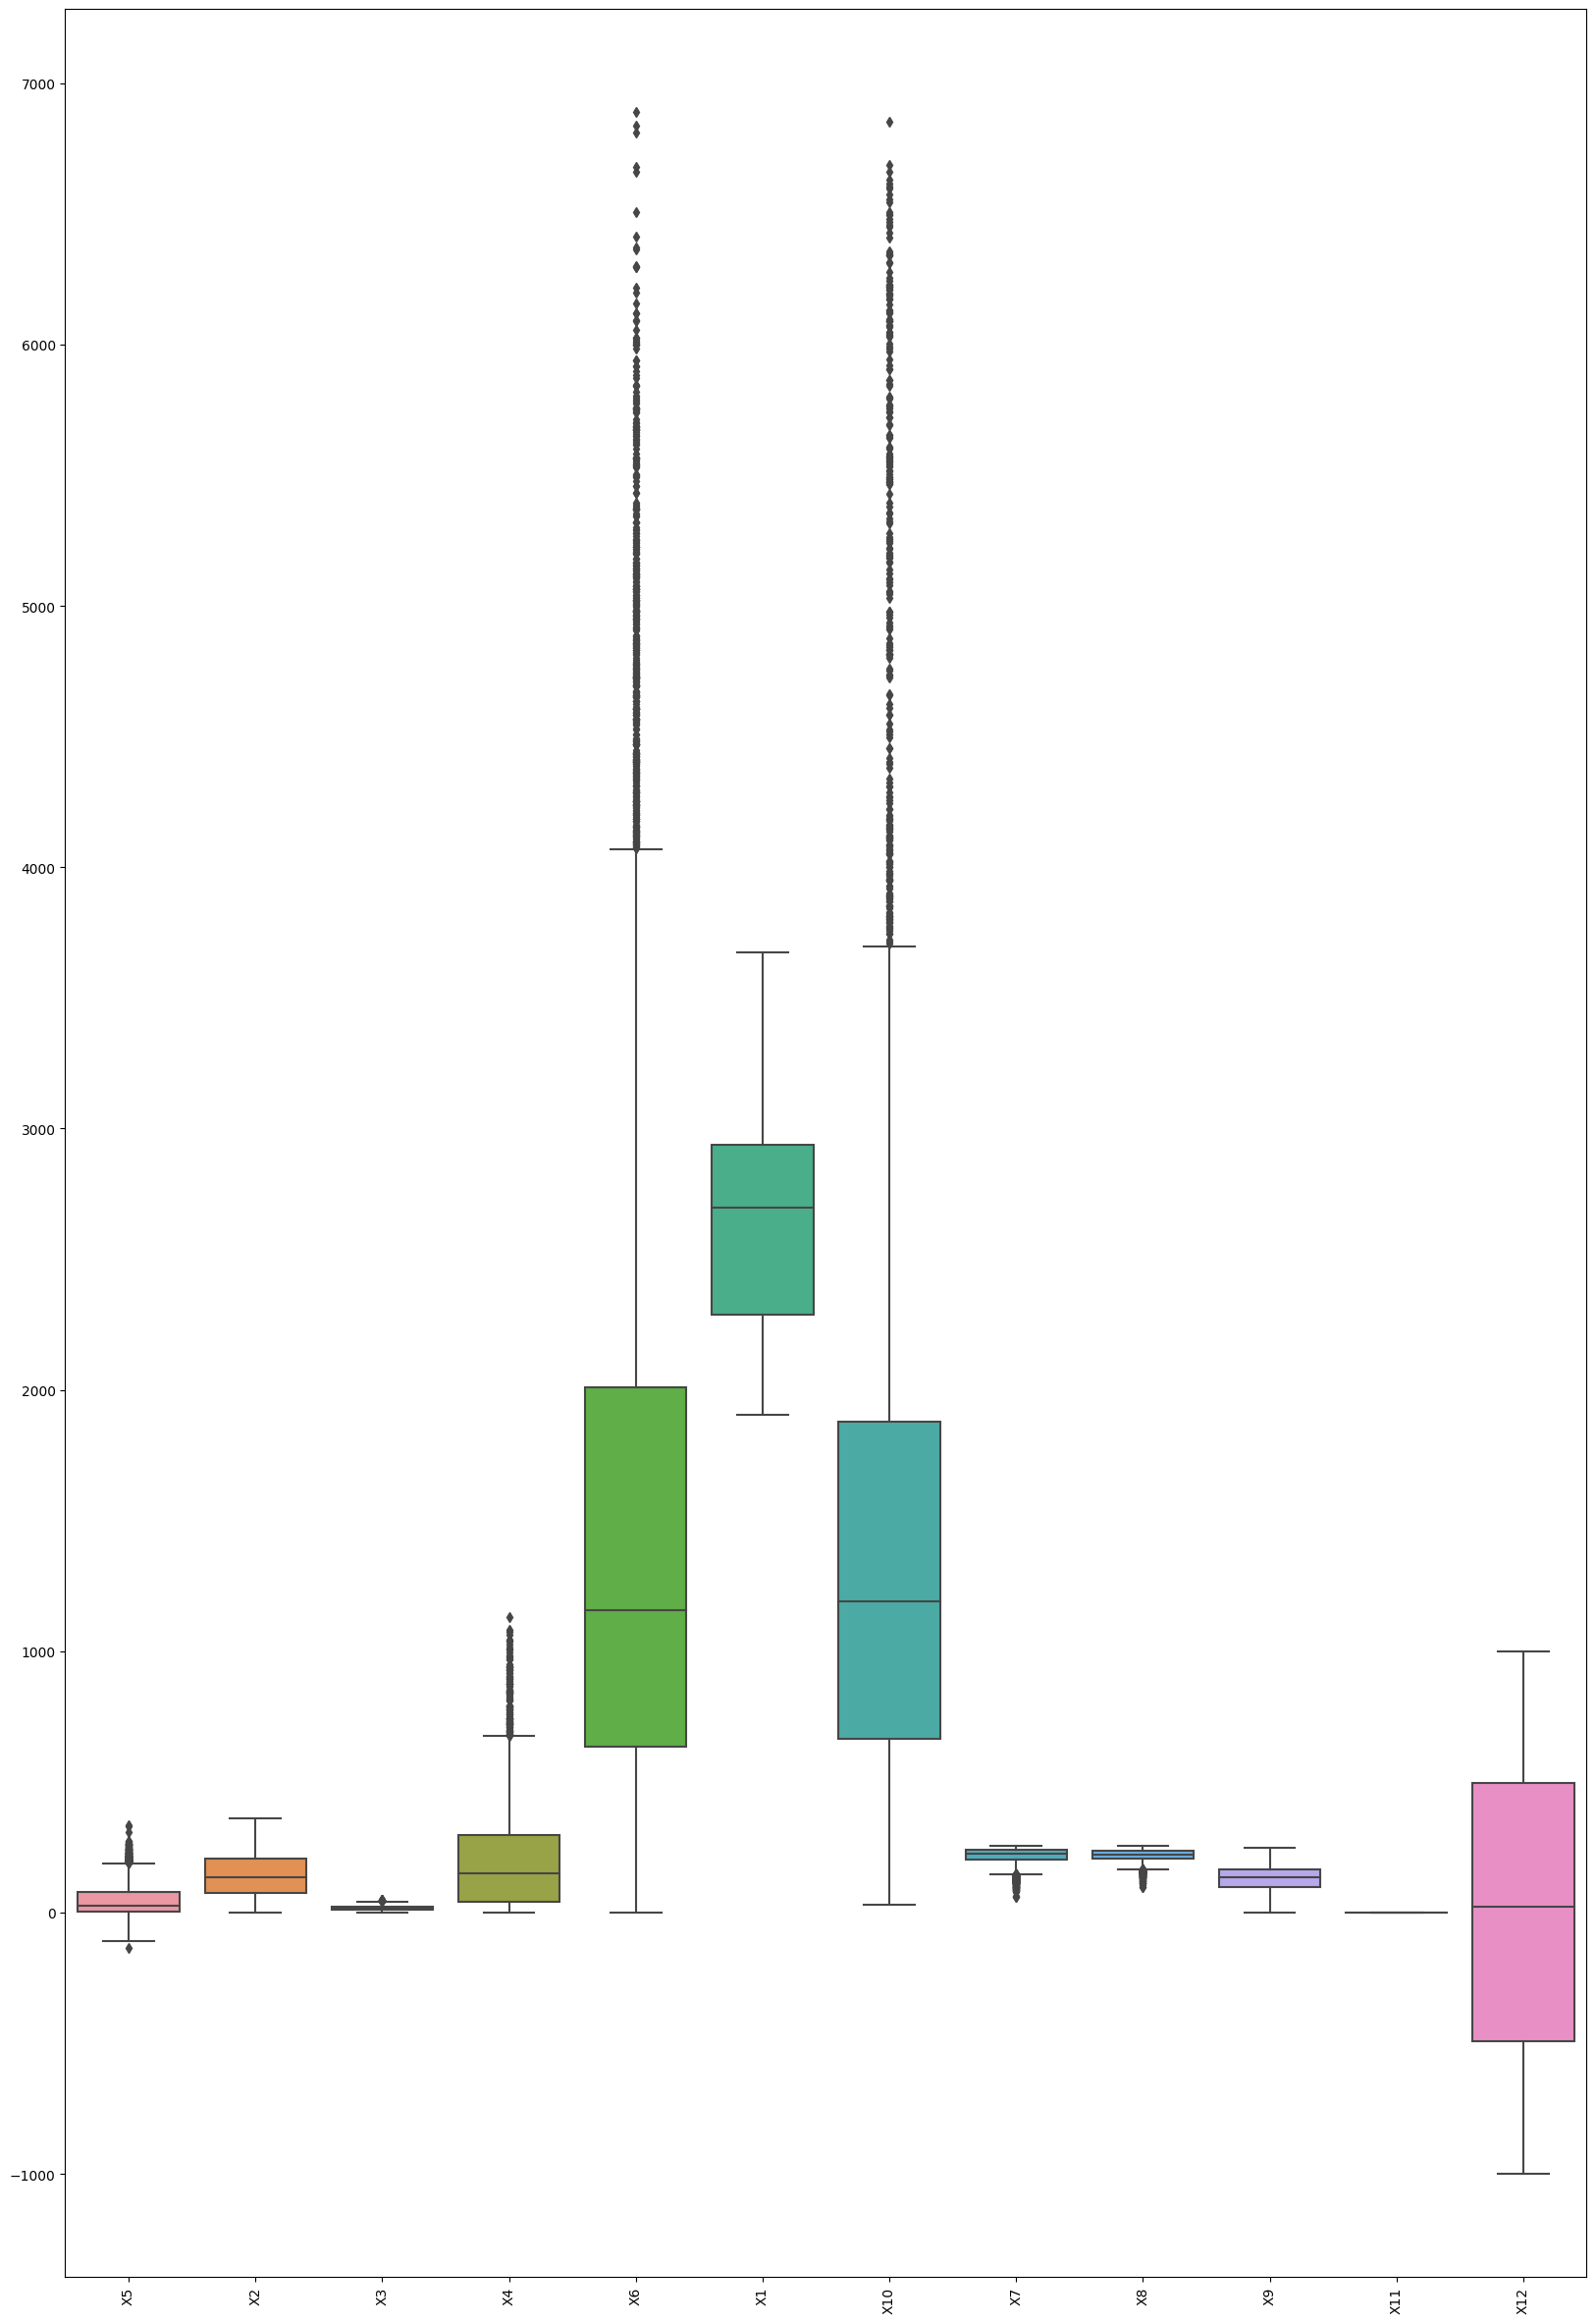

In [8]:
#check for outliers for all data which has X5	X2	X3	X4	X6	X1	X10	X7	X8	X9	X11	X12	X15	X13	X14	Y in multiple boxplots

# fig, axs = plt.subplots(6, 2, figsize=(40, 80))
# for i in range(6):
#     for j in range(2):
#         plt1 = sns.boxplot(df[df.columns[i+j]], ax = axs[i,j])
#         plt1.set(xlabel=df.columns[i+j])
#         plt1.set_title(df.columns[i+j], fontsize=50)


# plt.tight_layout()

#check for outliers for all data which has X5	X2	X3	X4	X6	X1	X10	X7	X8	X9	X11	X12	X15	X13	X14	Y in multiple boxplots
plt.figure(figsize=(20,30))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()





## Information of Categorical Data

In [9]:
#uniques of all columns
for i in ['X14', 'X13', 'Y']:
    print("Name:",i,"|Data", df[i].unique()," |Count",len(df[i].unique()))

Name: X14 |Data [' CA49' ' CA50' ' CA26' ' CA32' ' CA38' ' CA42' ' CA37' ' CA23' ' CA24'
 ' CA21' ' CA43' ' CA22' ' CA36' ' CA33' ' CA44' ' CA59' ' CA30' ' CA51'
 ' CA52' ' CA31' ' CA40' ' CA58' ' CA25' ' CA39' ' CA53' ' CA60' ' CA46'
 ' CA34' ' CA41' ' CA48' ' CA54' ' CA55']  |Count 32
Name: X13 |Data [' FC11' ' FC14' ' FC13' ' FC12']  |Count 4
Name: Y |Data ['BMW' 'Mercedes' 'Ford' 'Toyota' 'Honda' 'GMC']  |Count 6


In [10]:
# print number of unique value of Y and there number of values
print(df['Y'].value_counts())

Mercedes    1620
BMW         1571
Toyota      1275
Honda       1250
GMC          308
Ford         100
Name: Y, dtype: int64


In [11]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [12]:
!pip install imblearn

## Binary encoding of categorical data

In [13]:
# Binary encoding for X14 , X13, Y
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['X14', 'X13'])
df = encoder.fit_transform(df)

In [14]:
df.columns

Index(['X5', 'X2', 'X3', 'X4', 'X6', 'X1', 'X10', 'X7', 'X8', 'X9', 'X11',
       'X12', 'X13_0', 'X13_1', 'X13_2', 'X14_0', 'X14_1', 'X14_2', 'X14_3',
       'X14_4', 'X14_5', 'Y'],
      dtype='object')

## Splitting the data into training and testing data

In [15]:
#split data into train and test
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4286, 21) (1838, 21) (4286,) (1838,)


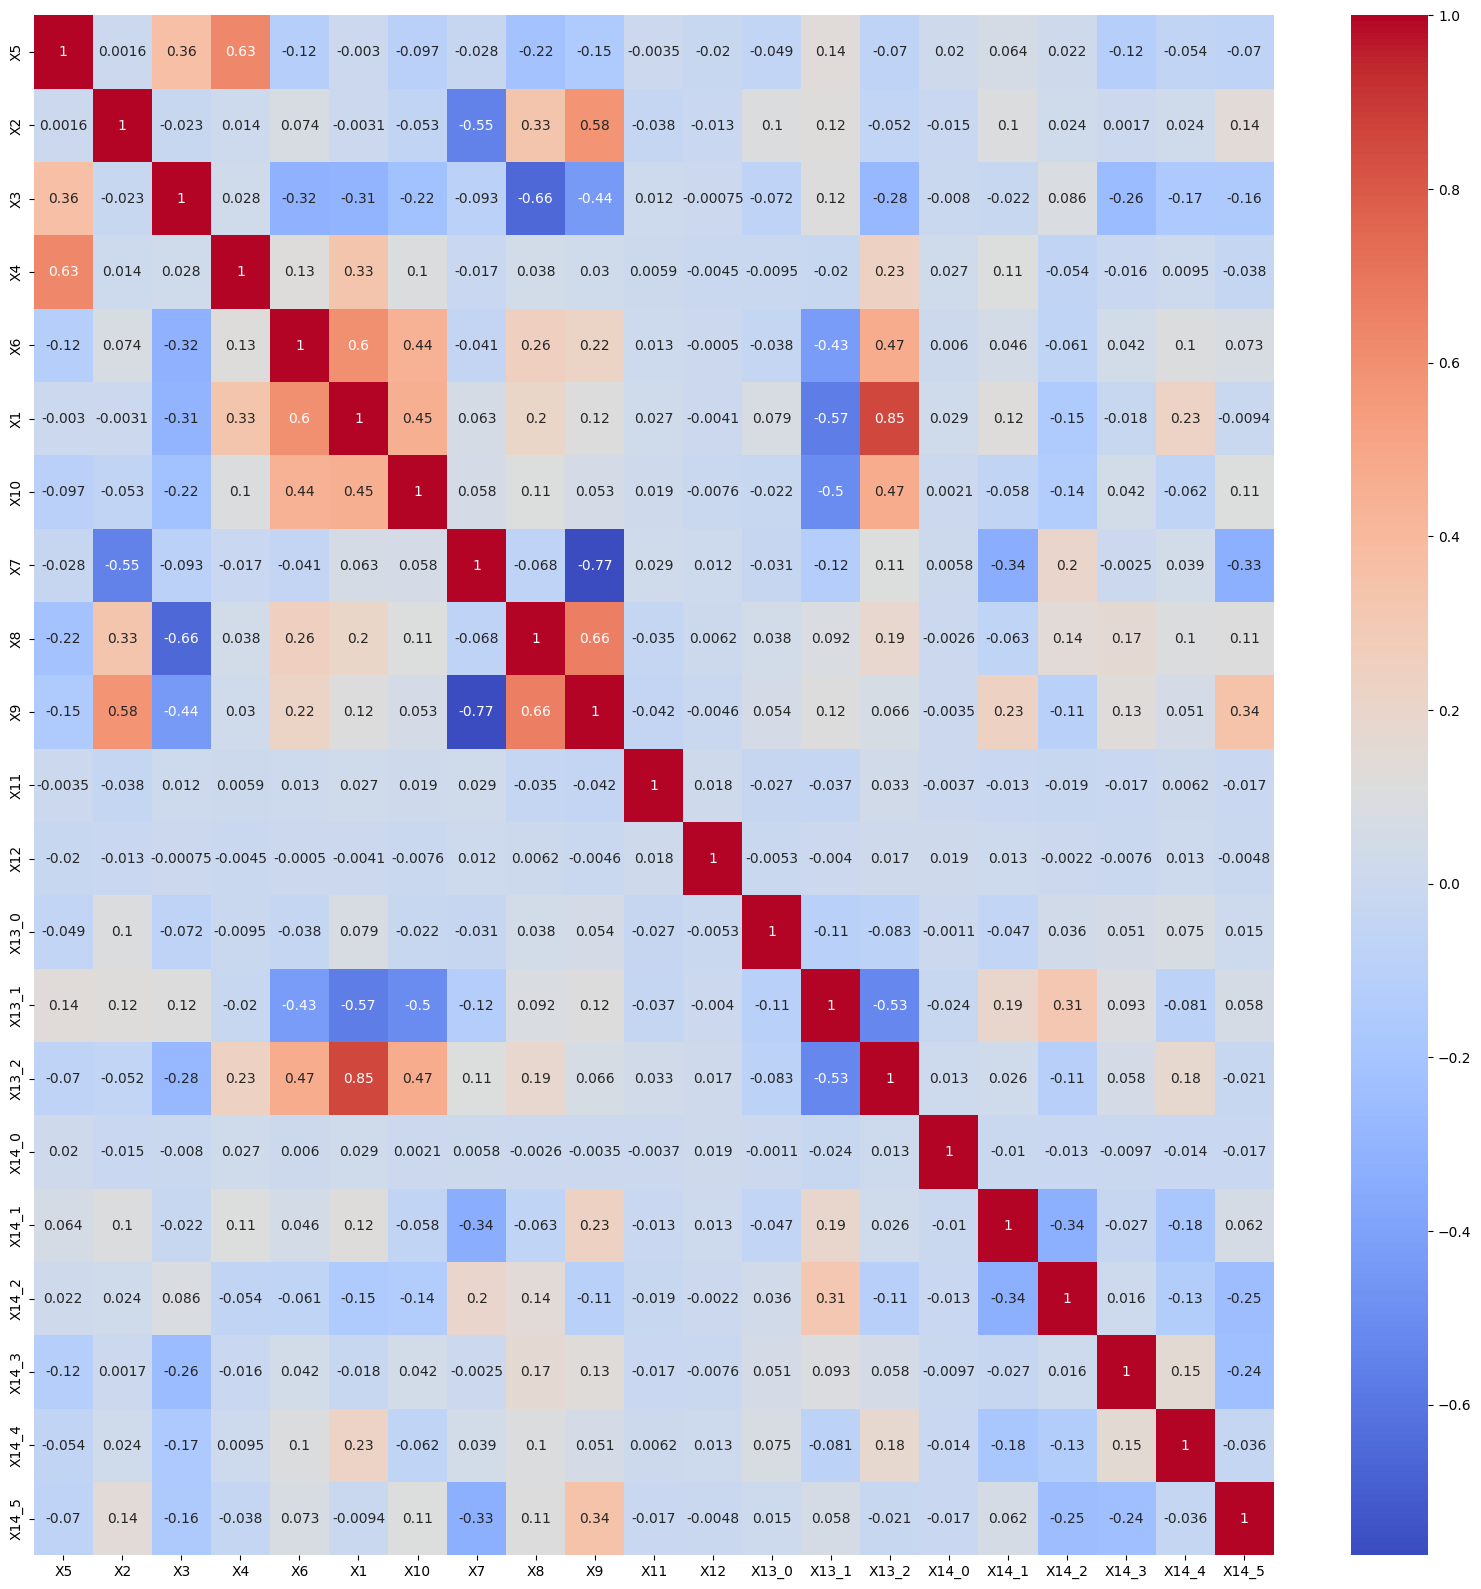

    Feature 1 Feature 2  Correlation
80         X6       X12    -0.000502
47         X3       X12    -0.000749
176     X13_0     X14_0    -0.001072
0          X5        X2     0.001569
36         X2     X14_3     0.001676
..        ...       ...          ...
2          X5        X4     0.631523
44         X3        X8    -0.656990
132        X8        X9     0.662837
120        X7        X9    -0.773337
98         X1     X13_2     0.854851

[210 rows x 3 columns]


In [16]:
# display correlation matrix

corr = X_train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Take the upper triangle of the correlation matrix, excluding the diagonal
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
correlation_pairs = upper_triangle.stack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
sorted_pairs = correlation_pairs.reindex(correlation_pairs.Correlation.abs().sort_values(ascending=True).index)
print(sorted_pairs)


In [17]:
!pip install seaborn

## Dealing with Inbalance Data

Counter({'BMW': 1122, 'Mercedes': 1091, 'Toyota': 912, 'Honda': 873, 'GMC': 215, 'Ford': 73})


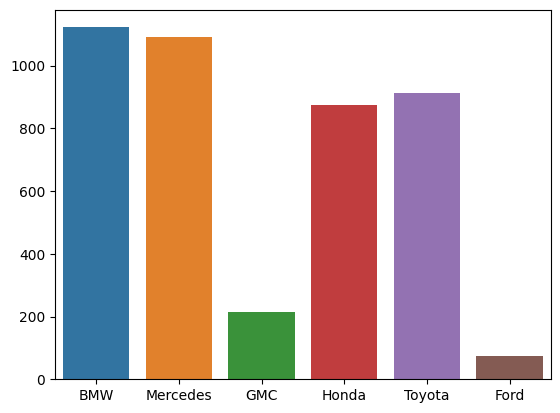

In [18]:
#SMOTE, oversampling, undersampling, SMOTEENN, SMOTETomek, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, SMOTENC
from imblearn.over_sampling import SMOTE
from collections import Counter


# summarize class distribution
counter = Counter(y_train)
print(counter)

#plot barplot of y_train
keys = np.array(list(counter.keys()))
values = np.array(list(counter.values()))
sns.barplot(x=keys, y=values)
plt.show()



Counter({'BMW': 1122, 'Mercedes': 1122, 'GMC': 1122, 'Honda': 1122, 'Toyota': 1122, 'Ford': 1122})


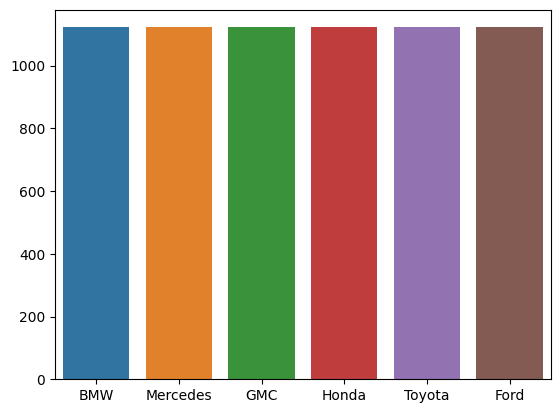

In [19]:
# transform the dataset
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)


# summarize the new class distribution
counter = Counter(y_train)
print(counter)
#plot barplot of y_train
keys = np.array(list(counter.keys()))
values = np.array(list(counter.values()))
sns.barplot(x=keys, y=values)
plt.show()


## Binary encoding of y

In [20]:
# Binary encoding for X14 , X13, Y
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
# encoder = ce.BinaryEncoder()
print(X_train.shape, y_train.shape)
y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

print(y_train_encoded.shape, y_test_encoded.shape)

(6732, 21) (6732,)
(6732, 6) (1838, 6)


In [21]:
# y_train.columns

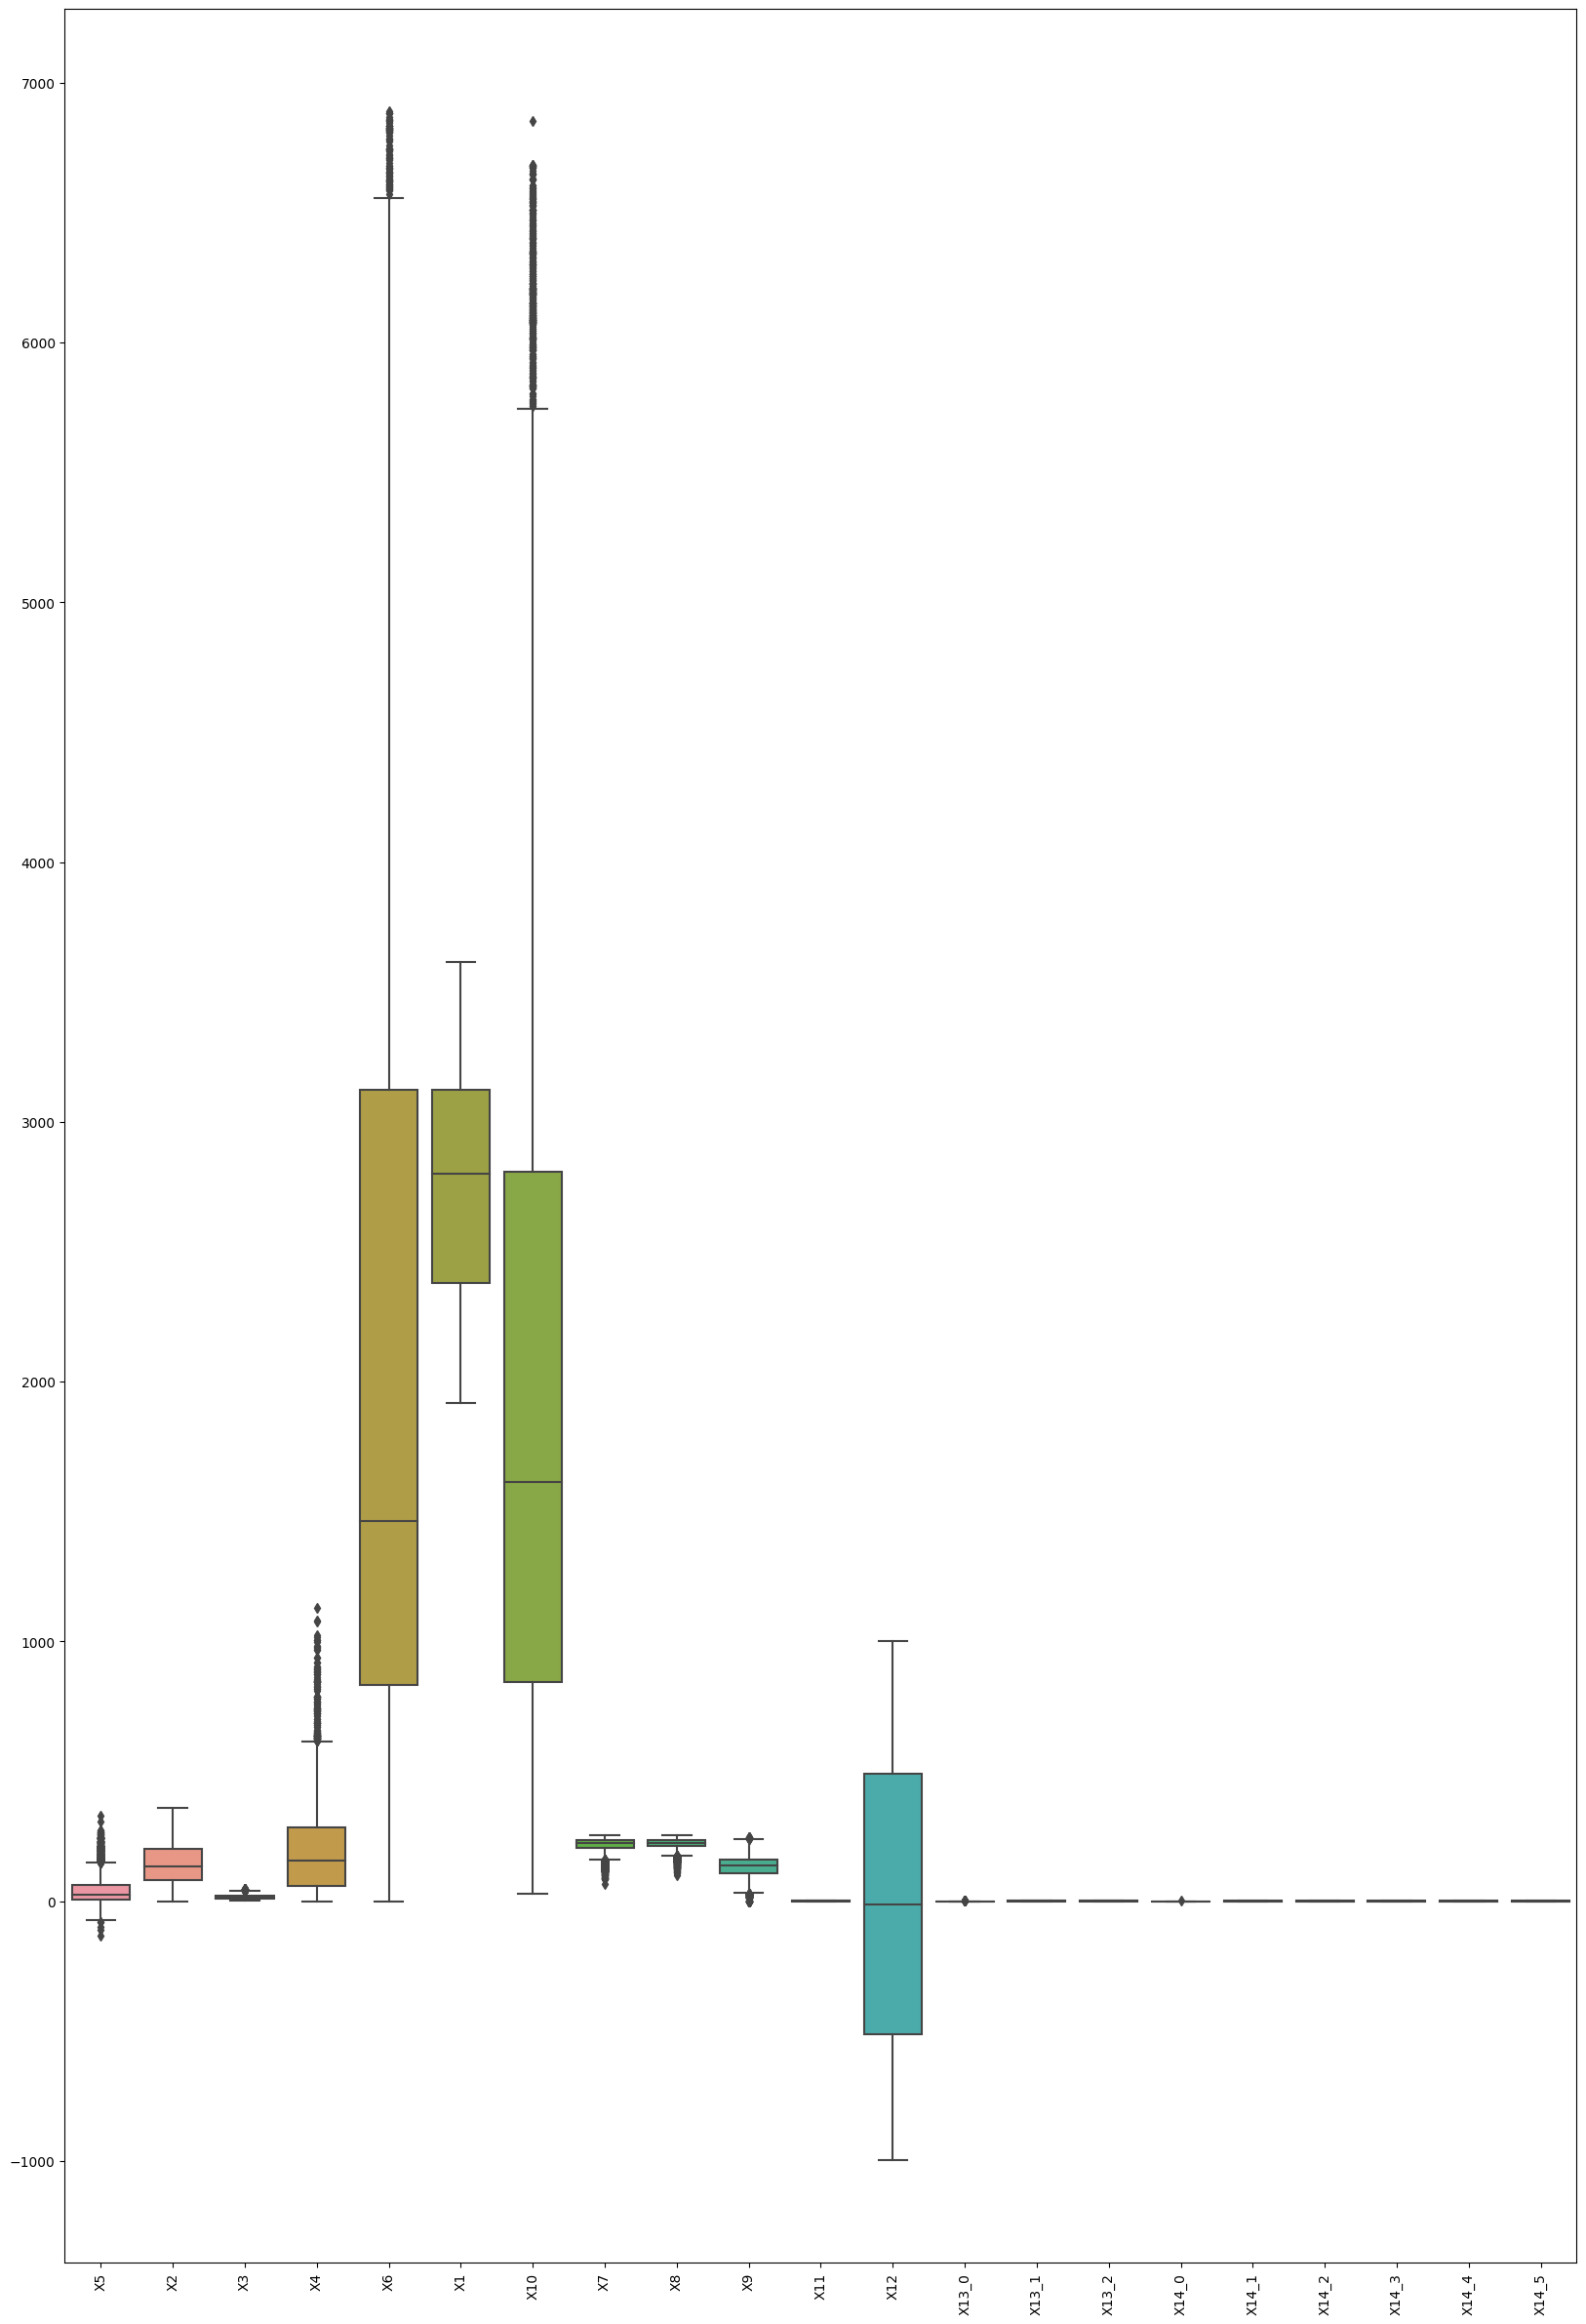

In [22]:
plt.figure(figsize=(20,30))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()

## Data Normalization

In [23]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape, y_train_encoded.shape, y_test_encoded.shape)

(6732, 21) (1838, 21) (6732,) (1838,)
(6732, 21) (1838, 21) (6732, 6) (1838, 6)


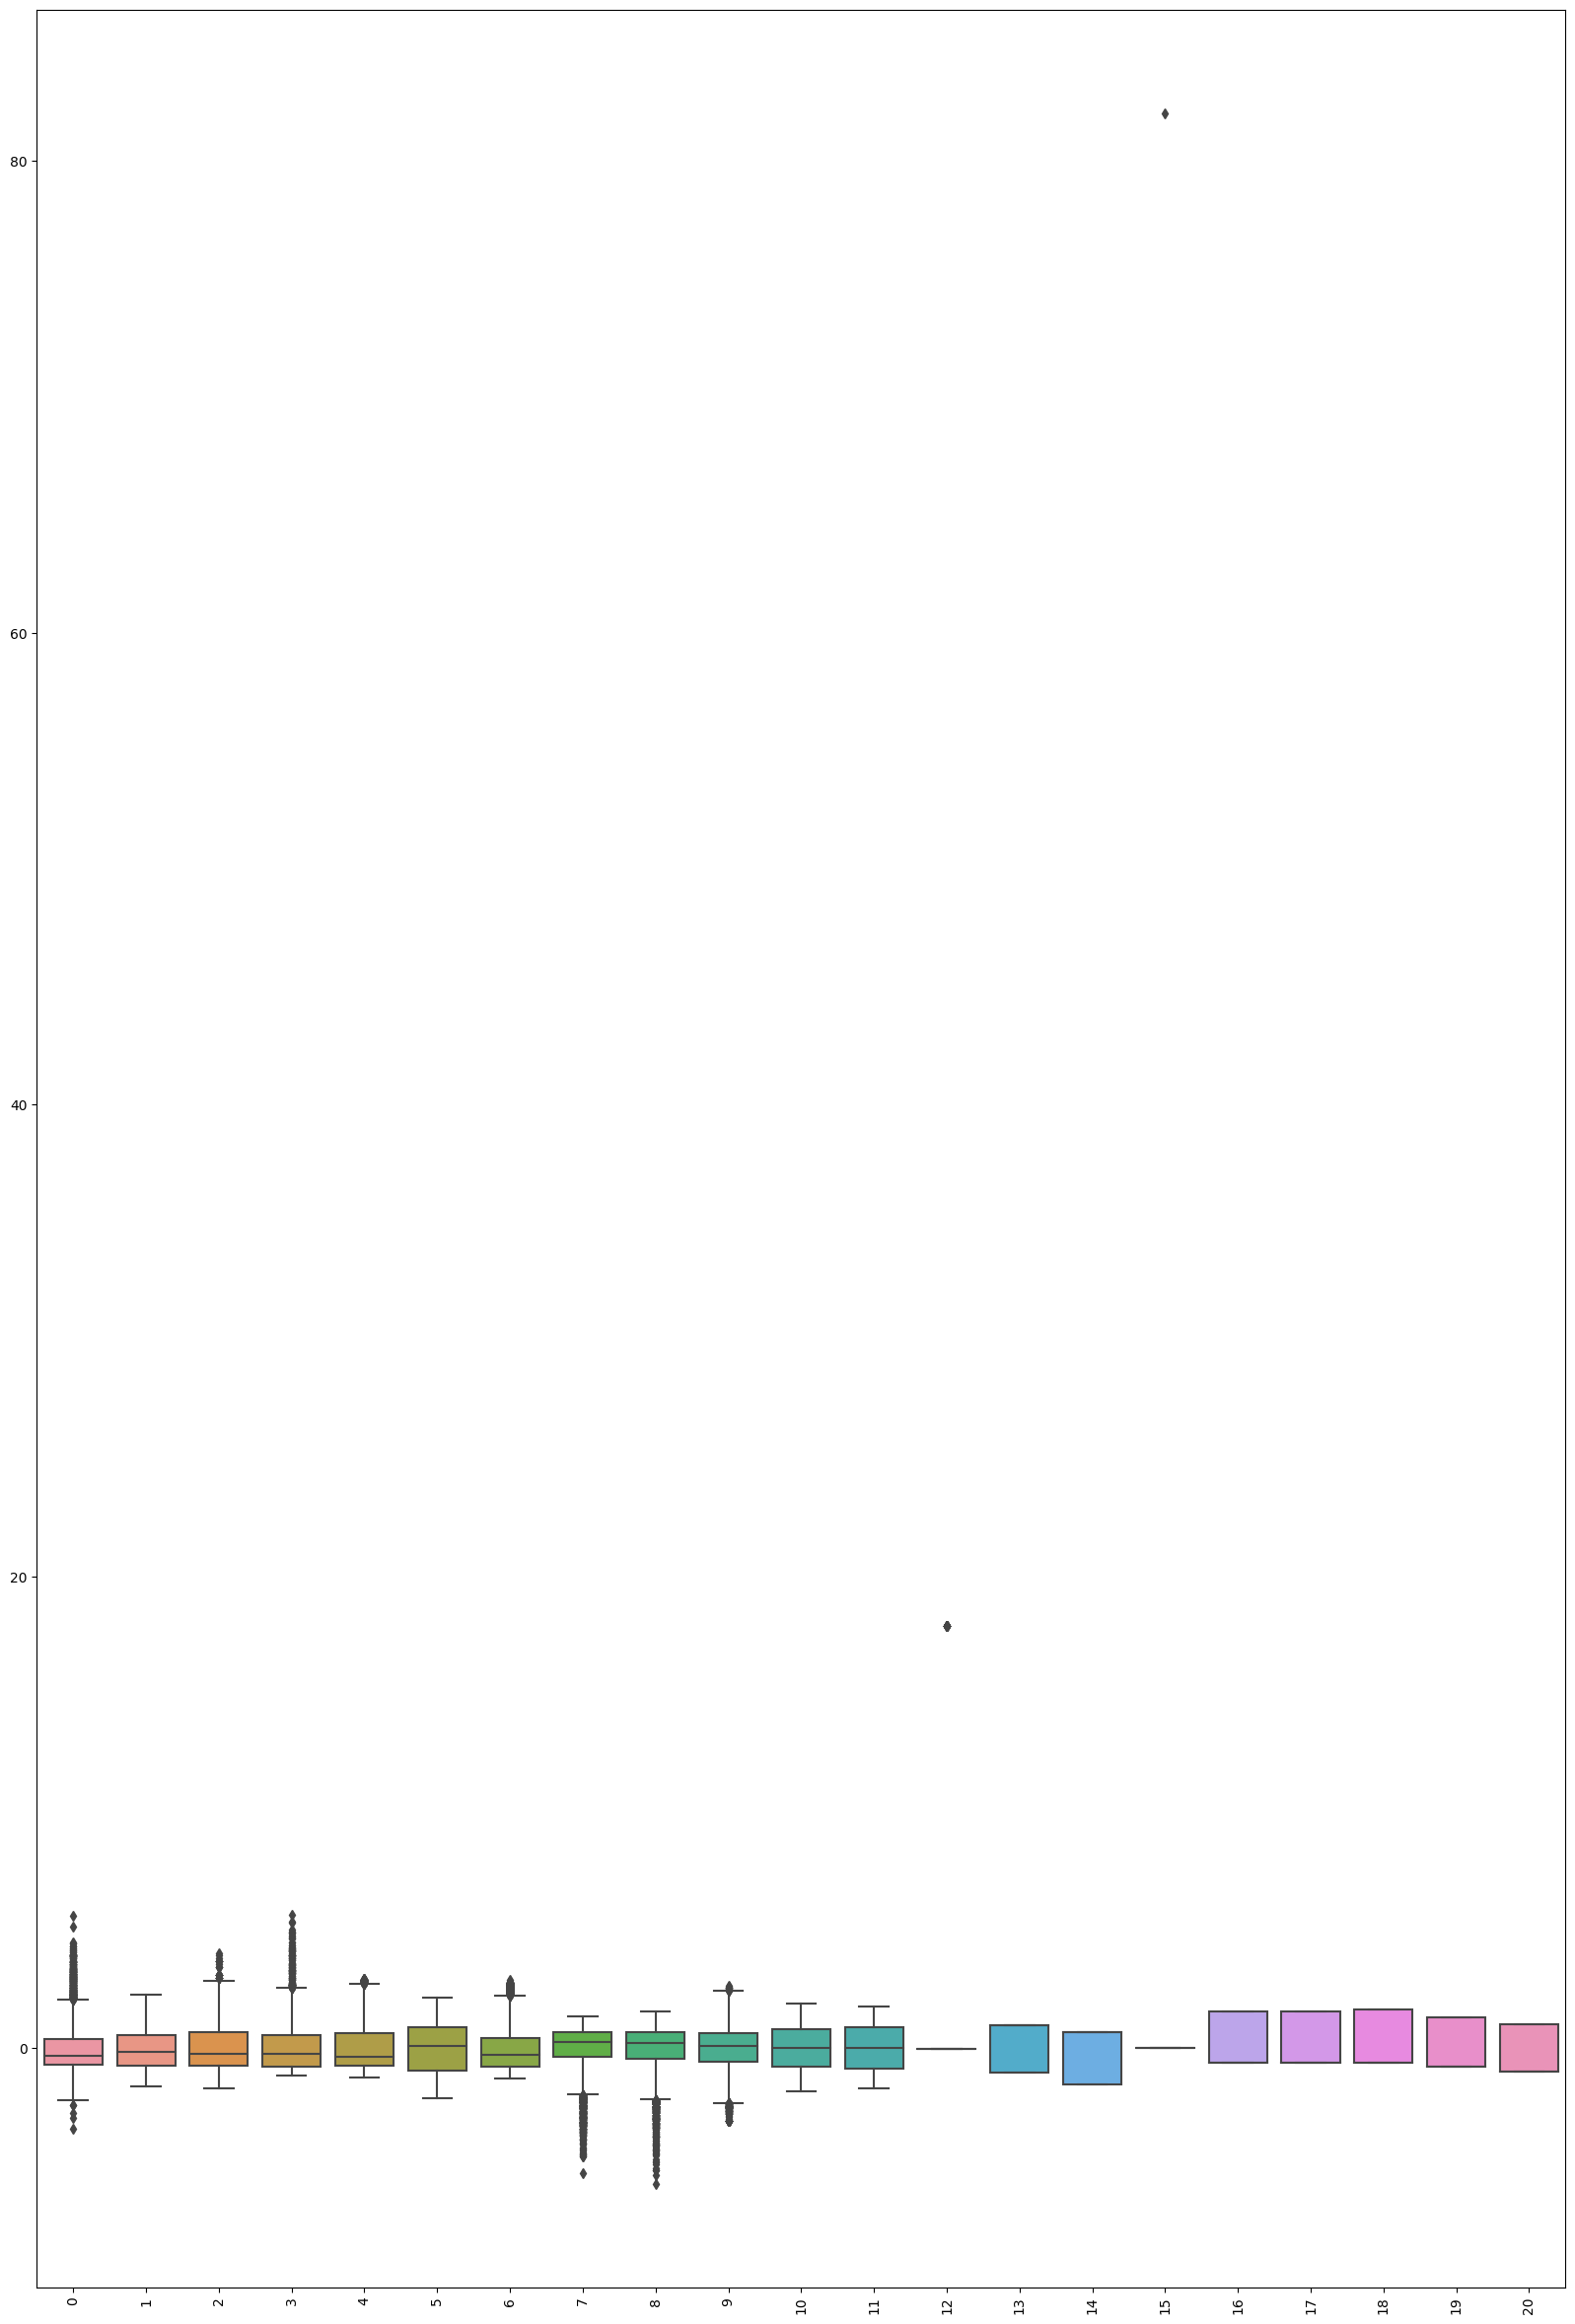

In [24]:
plt.figure(figsize=(20,30))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()

In [25]:
# count number of outleirs in each column
#convert numpy array to dataframe
X_train = pd.DataFrame(X_train)
for i in X_train:

    Q1 = X_train[i].quantile(0.25)
    Q3 = X_train[i].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = X_train[(X_train[i] < (Q1 - 1.5 * IQR)) | (X_train[i] > (Q3 + 1.5 * IQR))]

    # Count number of outliers
    number_of_outliers = len(outliers)

    print(f"Number of outliers in {i}: {number_of_outliers}")

Number of outliers in 0: 368
Number of outliers in 1: 0
Number of outliers in 2: 37
Number of outliers in 3: 134
Number of outliers in 4: 86
Number of outliers in 5: 0
Number of outliers in 6: 353
Number of outliers in 7: 399
Number of outliers in 8: 280
Number of outliers in 9: 143
Number of outliers in 10: 0
Number of outliers in 11: 0
Number of outliers in 12: 21
Number of outliers in 13: 0
Number of outliers in 14: 0
Number of outliers in 15: 1
Number of outliers in 16: 0
Number of outliers in 17: 0
Number of outliers in 18: 0
Number of outliers in 19: 0
Number of outliers in 20: 0


In [26]:
display(y_train_encoded.head())

,BMW,Ford,GMC,Honda,Mercedes,Toyota
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0


In [27]:
def models(parameters,model,X_train,y_train_categorical,X_test,y_test_categorical):
    #grid search for the model
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator=model,
                            param_grid=parameters,
                            scoring='accuracy',
                            cv=10,
                            n_jobs=-1)
    grid_search.fit(X_train, y_train_categorical)
    best_accuracy = grid_search.best_score_
    best_parameters = grid_search.best_params_
    print("Best Accuracy: ",best_accuracy)
    print("Parameters: ",best_parameters)
    best_model = grid_search.best_estimator_


    #predicting the test data
    y_pred = best_model.predict(X_test)

    #confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test_categorical, y_pred)
    print(cm)

    #accuracy score
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test_categorical, y_pred)
    print("Test Accuracy",accuracy)

    #classification report
    from sklearn.metrics import classification_report
    print(classification_report(y_test_categorical, y_pred))


    #cross validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator=best_model, X=X_train, y=y_train_categorical, cv=10)
    print("Mean Accuracies: ",accuracies.mean())
    print("std Accuracies: ",accuracies.std())

    return best_model


In [28]:
y_train_categorical = np.argmax(y_train_encoded.values, axis=1)
display(y_train_categorical)
display(y_test_encoded)
y_test_categorical = np.argmax(y_test_encoded.values, axis=1)


array([0, 4, 0, ..., 5, 5, 5])

,BMW,Ford,GMC,Honda,Mercedes,Toyota
547,0,0,0,0,1,0
2422,0,0,0,0,1,0
4830,0,0,0,0,0,1
6036,0,0,0,0,0,1
2165,0,0,0,0,1,0
...,...,...,...,...,...,...
2378,0,0,0,0,0,1
4991,0,0,0,1,0,0
3008,0,0,1,0,0,0
945,0,0,0,0,0,1


In [29]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regresstion = models(parameters={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},model=LogisticRegression(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)


Best Accuracy:  0.8620067812752149
Parameters:  {'C': 1}
[[386  30   0  19   0  14]
 [  2  23   0   0   0   2]
 [  0   0  79   0   0  14]
 [ 16   0   0 273  88   0]
 [  0   0   0  64 465   0]
 [ 27  15  53   1   0 267]]
Test Accuracy 0.8122959738846572
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       449
           1       0.34      0.85      0.48        27
           2       0.60      0.85      0.70        93
           3       0.76      0.72      0.74       377
           4       0.84      0.88      0.86       529
           5       0.90      0.74      0.81       363

    accuracy                           0.81      1838
   macro avg       0.72      0.82      0.75      1838
weighted avg       0.83      0.81      0.82      1838

Mean Accuracies:  0.8620067812752149
std Accuracies:  0.01112685682799291


In [30]:
#SVM
from sklearn.svm import SVC
svm = models(parameters={'C': [0.1, 1, 10, 100], 'kernel': ['linear']},model=SVC(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.867204950595456
Parameters:  {'C': 100, 'kernel': 'linear'}
[[396  22   0  21   0  10]
 [  1  24   0   0   0   2]
 [  0   0  79   0   0  14]
 [ 15   0   0 271  91   0]
 [  0   0   0  60 469   0]
 [ 28  14  56   0   0 265]]
Test Accuracy 0.8182807399347116
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       449
           1       0.40      0.89      0.55        27
           2       0.59      0.85      0.69        93
           3       0.77      0.72      0.74       377
           4       0.84      0.89      0.86       529
           5       0.91      0.73      0.81       363

    accuracy                           0.82      1838
   macro avg       0.73      0.83      0.76      1838
weighted avg       0.83      0.82      0.82      1838

Mean Accuracies:  0.867204950595456
std Accuracies:  0.008787257711067559


In [31]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = models(parameters={'n_neighbors': [5, 10, 15, 20, 25, 30]},model=KNeighborsClassifier(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.8661584384548568
Parameters:  {'n_neighbors': 5}
[[402  11   3  13   0  20]
 [  1  23   1   0   0   2]
 [  3   0  84   0   0   6]
 [ 21   0   0 287  69   0]
 [  0   0   0  35 494   0]
 [ 45  19  42   2   0 255]]
Test Accuracy 0.8405875952121872
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       449
           1       0.43      0.85      0.58        27
           2       0.65      0.90      0.75        93
           3       0.85      0.76      0.80       377
           4       0.88      0.93      0.90       529
           5       0.90      0.70      0.79       363

    accuracy                           0.84      1838
   macro avg       0.76      0.84      0.78      1838
weighted avg       0.85      0.84      0.84      1838

Mean Accuracies:  0.8661584384548568
std Accuracies:  0.010489628464746263


In [32]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = models(parameters={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25, 30]},model=DecisionTreeClassifier(),X_train=X_train,y_train_categorical=y_train_categorical,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.9355375417215974
Parameters:  {'criterion': 'entropy', 'max_depth': 25}
[[420   5   0  17   0   7]
 [  0  21   0   1   0   5]
 [  0   0  80   0   0  13]
 [ 13   0   0 321  43   0]
 [  0   0   0  43 486   0]
 [ 16   7  22   3   0 315]]
Test Accuracy 0.8939064200217628
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       449
           1       0.64      0.78      0.70        27
           2       0.78      0.86      0.82        93
           3       0.83      0.85      0.84       377
           4       0.92      0.92      0.92       529
           5       0.93      0.87      0.90       363

    accuracy                           0.89      1838
   macro avg       0.84      0.87      0.85      1838
weighted avg       0.90      0.89      0.89      1838

Mean Accuracies:  0.9343488344407653
std Accuracies:  0.012619587680670171


In [33]:
!pip install lazypredict

In [34]:
from lazypredict.Supervised import LazyClassifier


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_df, predictions = clf.fit(X_train, X_test, y_train_categorical, y_test_categorical)
display(models_df)



 97%|█████████▋| 28/29 [00:55<00:01,  1.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2537
[LightGBM] [Info] Number of data points in the train set: 6732, number of used features: 20
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:56<00:00,  1.96s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.94,0.93,None,0.94,1.58
LGBMClassifier,0.94,0.93,None,0.94,1.45
ExtraTreesClassifier,0.94,0.92,None,0.94,1.32
BaggingClassifier,0.92,0.92,None,0.92,0.78
RandomForestClassifier,0.93,0.91,None,0.93,1.83
DecisionTreeClassifier,0.91,0.89,None,0.91,0.22
SVC,0.88,0.88,None,0.88,1.80
LabelSpreading,0.86,0.85,None,0.86,15.02
LabelPropagation,0.86,0.85,None,0.86,5.47


## After Deletting Outliers

In [35]:

#delete outliers
print(X_train.shape, y_train_categorical.shape)
X_train_no = X_train[(X_train < 3).all(axis=1)]
y_train_no = y_train_categorical[(X_train < 3).all(axis=1)]


print(X_train_no.shape, y_train_no.shape)
print(X_train_no.shape, y_train_no.shape)

(6732, 21) (6732,)
(6480, 21) (6480,)
(6480, 21) (6480,)


In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

print(type(X_train_no),type(y_train_no),type(X_test),type(y_test_categorical))
logistic_regresstion_no = models(parameters={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
                            model=LogisticRegression(),
                            X_train=X_train_no,
                            y_train_categorical=y_train_no,
                            X_test=X_test,
                            y_test_categorical=y_test_categorical)

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Best Accuracy:  0.8598765432098764
Parameters:  {'C': 1}
[[384  30   0  19   0  16]
 [  2  23   0   0   0   2]
 [  0   0  79   0   0  14]
 [ 16   0   0 272  89   0]
 [  0   0   0  70 459   0]
 [ 26  15  54   1   0 267]]
Test Accuracy 0.8073993471164309
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       449
           1       0.34      0.85      0.48        27
           2       0.59      0.85      0.70        93
           3       0.75      0.72      0.74       377
           4       0.84      0.87      0.85       529
           5       0.89      0.74      0.81       363

    accuracy                           0.81      1838
   macro avg       0.72      0.81      0.74      1838
weighted avg       0.83      0.81      0.81      1838

Mean Accuracies:  0.8598765432098764
std Accuracies:  0.014718048169835041


In [37]:
#SVM
from sklearn.svm import SVC
svm = models(parameters={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear','rbf']},model=SVC(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.9391975308641974
Parameters:  {'C': 10, 'kernel': 'rbf'}
[[428   3   0   9   0   9]
 [  1  21   0   0   0   5]
 [  0   0  82   0   0  11]
 [ 10   0   0 320  47   0]
 [  0   0   0  24 505   0]
 [ 21   4  21   0   0 317]]
Test Accuracy 0.9102285092491839
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       449
           1       0.75      0.78      0.76        27
           2       0.80      0.88      0.84        93
           3       0.91      0.85      0.88       377
           4       0.91      0.95      0.93       529
           5       0.93      0.87      0.90       363

    accuracy                           0.91      1838
   macro avg       0.87      0.88      0.88      1838
weighted avg       0.91      0.91      0.91      1838

Mean Accuracies:  0.9391975308641974
std Accuracies:  0.01062912059118677


In [38]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = models(parameters={'n_neighbors': [5, 10, 15, 20, 25, 30]},model=KNeighborsClassifier(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.8641975308641976
Parameters:  {'n_neighbors': 5}
[[399  11   3  14   0  22]
 [  1  23   1   0   0   2]
 [  4   0  84   0   0   5]
 [ 22   0   0 286  69   0]
 [  0   0   0  36 493   0]
 [ 46  19  45   2   0 251]]
Test Accuracy 0.8356909684439608
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       449
           1       0.43      0.85      0.58        27
           2       0.63      0.90      0.74        93
           3       0.85      0.76      0.80       377
           4       0.88      0.93      0.90       529
           5       0.90      0.69      0.78       363

    accuracy                           0.84      1838
   macro avg       0.76      0.84      0.78      1838
weighted avg       0.85      0.84      0.84      1838

Mean Accuracies:  0.8641975308641976
std Accuracies:  0.01028292052404795


In [39]:
#Desicion Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = models(parameters={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 15, 20, 25, 30]},model=DecisionTreeClassifier(),X_train=X_train_no,y_train_categorical=y_train_no,X_test=X_test,y_test_categorical=y_test_categorical)

Best Accuracy:  0.930864197530864
Parameters:  {'criterion': 'entropy', 'max_depth': 20}
[[413   4   0  17   0  15]
 [  0  22   0   1   0   4]
 [  0   0  77   0   0  16]
 [ 12   0   0 327  36   2]
 [  0   0   0  44 485   0]
 [ 21   7  20   1   0 314]]
Test Accuracy 0.8911860718171926
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       449
           1       0.67      0.81      0.73        27
           2       0.79      0.83      0.81        93
           3       0.84      0.87      0.85       377
           4       0.93      0.92      0.92       529
           5       0.89      0.87      0.88       363

    accuracy                           0.89      1838
   macro avg       0.84      0.87      0.85      1838
weighted avg       0.89      0.89      0.89      1838

Mean Accuracies:  0.9307098765432098
std Accuracies:  0.012771402059383066


In [40]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_df,predictions = clf.fit(X_train_no, X_test, y_train_no, y_test_categorical)
models_df

 97%|█████████▋| 28/29 [00:28<00:00,  1.55it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2507
[LightGBM] [Info] Number of data points in the train set: 6480, number of used features: 19
[LightGBM] [Info] Start training from score -1.814232
[LightGBM] [Info] Start training from score -1.753608
[LightGBM] [Info] Start training from score -1.767971
[LightGBM] [Info] Start training from score -1.799194
[LightGBM] [Info] Start training from score -1.782543
[LightGBM] [Info] Start training from score -1.835286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:29<00:00,  1.02s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.95,0.94,None,0.94,1.30
XGBClassifier,0.94,0.92,None,0.94,1.22
ExtraTreesClassifier,0.94,0.92,None,0.94,0.67
RandomForestClassifier,0.93,0.92,None,0.93,1.44
BaggingClassifier,0.91,0.90,None,0.91,0.60
DecisionTreeClassifier,0.89,0.88,None,0.89,0.09
SVC,0.89,0.88,None,0.89,1.05
LabelPropagation,0.85,0.84,None,0.85,2.66
LabelSpreading,0.85,0.84,None,0.85,6.27


## NN Model

In [41]:
# NN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC
from sklearn.metrics import roc_auc_score

#split data into train and validation
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train, y_train_encoded, test_size=0.3, random_state=777)

# define model
model = Sequential()
model.add(Dense(64, input_dim=X_train_nn.shape[1], activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# compile model
# model.compile(loss='ca', optimizer=Adam(learning_rate=0.001), metrics=[AUC()])
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[AUC()])
model.summary()

# fit model

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x=X_train_nn, y=y_train_nn, epochs=100, batch_size=128, validation_data=(X_val_nn, y_val_nn), callbacks=[early_stop])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Bat  (None, 16)                6

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


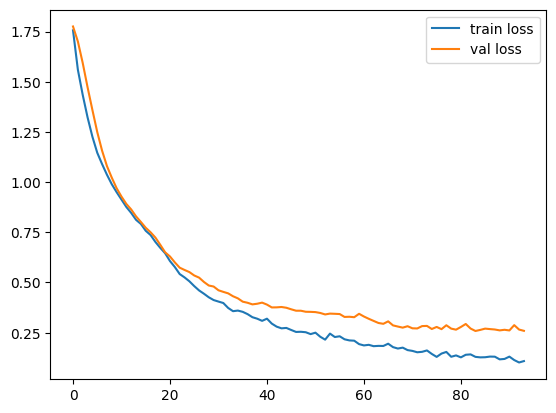

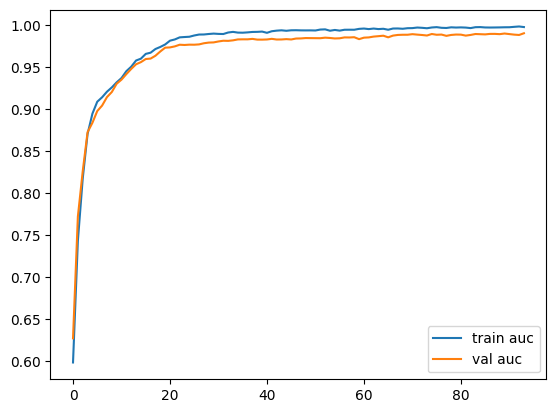

58/58 [==============================] - 0s 3ms/step
Test Accuracy 0.8824809575625681
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       449
           1       0.54      0.74      0.62        27
           2       0.73      0.89      0.81        93
           3       0.85      0.84      0.85       377
           4       0.91      0.92      0.91       529
           5       0.91      0.85      0.88       363

    accuracy                           0.88      1838
   macro avg       0.81      0.86      0.83      1838
weighted avg       0.89      0.88      0.88      1838



In [42]:
print(history.history.keys())
#  plot loss per iteration
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot auc per iteration
plt.plot(history.history['auc'], label='train auc')
plt.plot(history.history['val_auc'], label='val auc')
plt.legend()
plt.show()

# predict probabilities for test set
y_pred = model.predict(X_test)
y_pred_categorical = np.argmax(y_pred, axis=1)

#accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_categorical, y_pred_categorical)
print("Test Accuracy",accuracy)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical, y_pred_categorical))

In [43]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
}

#grid search for the model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                        param_grid=parameters,
                        scoring='f1_macro',
                        cv=10,
                        n_jobs=-1)
grid_search.fit(X_train, y_train_categorical)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best F1 Macro Score:",best_accuracy)
print("Parameters:",best_parameters)
best_model = grid_search.best_estimator_


#predicting the test data
y_pred = best_model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_categorical, y_pred)
print(cm)

#accuracy score
score = f1_score(y_test_categorical, y_pred, average='macro')
print("Test F1 Macro Score:",score)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical, y_pred))

Best F1 Macro Score: 0.9664109760611754
Parameters: {'criterion': 'entropy', 'n_estimators': 300}
[[437   3   0   9   0   0]
 [  1  23   0   0   0   3]
 [  0   0  88   0   0   5]
 [ 10   0   0 334  33   0]
 [  0   0   0  15 514   0]
 [ 18   6  10   1   0 328]]
Test F1 Macro Score: 0.909633470086069
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       449
           1       0.72      0.85      0.78        27
           2       0.90      0.95      0.92        93
           3       0.93      0.89      0.91       377
           4       0.94      0.97      0.96       529
           5       0.98      0.90      0.94       363

    accuracy                           0.94      1838
   macro avg       0.90      0.92      0.91      1838
weighted avg       0.94      0.94      0.94      1838



In [ ]:
# XGBClassifier Classifier
from xgboost import XGBClassifier
parameters={
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [100, 200, 300, 500],
    'objective': ['multi:softmax', 'multi:softprob'],
    'random_state': [777],
}


#grid search for the model
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(),
                        param_grid=parameters,
                        scoring='f1_macro',
                        cv=10,
                        n_jobs=-1)
grid_search.fit(X_train, y_train_categorical)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best F1 Macro Score:",best_accuracy)
print("Parameters:",best_parameters)
best_model = grid_search.best_estimator_

#predicting the test data
y_pred = best_model.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_categorical, y_pred)
print(cm)

#accuracy score
score = f1_score(y_test_categorical, y_pred, average='macro')
print("Test F1 Macro Score:",score)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical, y_pred))

Best F1 Macro Score: 0.9673449192845984
Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 500, 'objective': 'multi:softmax', 'random_state': 777}
[[433   1   0  13   0   2]
 [  0  24   0   0   0   3]
 [  0   0  88   0   0   5]
 [ 11   0   0 338  28   0]
 [  0   0   0   8 521   0]
 [ 20   3   9   0   0 331]]
Test F1 Macro Score: 0.9288314023448375
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       449
           1       0.86      0.89      0.87        27
           2       0.91      0.95      0.93        93
           3       0.94      0.90      0.92       377
           4       0.95      0.98      0.97       529
           5       0.97      0.91      0.94       363

    accuracy                           0.94      1838
   macro avg       0.93      0.93      0.93      1838
weighted avg       0.94      0.94      0.94      1838



# Active Learning

In [47]:
X = X_train
y = y_train_categorical
print(X.shape, y.shape)
# split data into labeled and unlabeled
x_labeled, x_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, train_size=100, random_state=777)
print(x_labeled.shape, x_unlabeled.shape, y_labeled.shape, y_unlabeled.shape)
# hyperparameters for the model
# parameters = best_parameters

parameters = {'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 500, 'objective': 'multi:softmax', 'random_state': 777}


(6732, 21) (6732,)
(100, 21) (6632, 21) (100,) (6632,)


## Least Confidence Sampling

In [48]:
# get least confident instances from unlabeled data
from scipy.stats import entropy

def lease_confidence(model, X_unlabeled, n_instances=1):
    # get probability of each instance
    proba = model.predict_proba(X_unlabeled)

    # get the least confident instances
    confidence = np.max(proba, axis=1)
    selected_idx = np.argsort(confidence)[:n_instances]

    query_idx = X_unlabeled.index[selected_idx].tolist()[0]

    return query_idx, selected_idx


## Entropy Sampling

In [57]:
def entropy_sampling(model, X_unlabeled, n_instances=1):
    # get probability of each instance
    proba = model.predict_proba(X_unlabeled)

    # get the least confident instances
    entropies = entropy(proba.T)
    selected_idx = np.argsort(entropies)[-n_instances:]

    query_idx = X_unlabeled.index[selected_idx].tolist()[0]

    return query_idx, selected_idx

## Computations

In [58]:
class EarlyStop:
    # if current - prev < threshold, stop
    def __init__(self, patience, threshold=0.0001):
        self.patience = patience
        self.wait = 0
        self.threshold = threshold
        self.prev_loss = None

    def __call__(self, loss):
        if self.prev_loss is None:
            self.prev_loss = loss
            return False
        else:
            if abs(loss - self.prev_loss) < self.threshold:
                if self.wait >= self.patience:
                    return True
                self.wait += 1
            else:
                self.prev_loss = loss
                self.wait = 0
                return False

In [63]:
# initialize active learneing loop
def active_learning(x_labeled, y_labeled, x_unlabeled, y_unlabeled, query_strategy = 'entropy'):
    # initialize the model
    early_stop = EarlyStop(patience=20, threshold=0.0001)
    model = XGBClassifier(**parameters)
    model.fit(x_labeled, y_labeled)
    y_pred = model.predict(x_unlabeled)
    print(y_pred.shape, y_unlabeled.shape)
    macro_f1 = []
    added_labels = 0
    macro_f1.append(f1_score(y_unlabeled, y_pred, average='macro'))
    print("Initial macro f1 score: ", macro_f1[-1])
    while not early_stop(macro_f1[-1]):
        if query_strategy == 'entropy':
            query_idx, selected_idx = entropy_sampling(model, x_unlabeled)
        elif query_strategy == 'least_confidence':
            query_idx, selected_idx = lease_confidence(model, x_unlabeled)
        else:
            print("Invalid query strategy")
            break

        # add new labeled data to train data
        x_labeled = np.vstack((x_labeled, x_unlabeled.loc[query_idx]))
        y_labeled = np.concatenate((y_labeled, y_unlabeled[selected_idx]))

        # remove labeled data from unlabeled data
        x_unlabeled = x_unlabeled.drop(query_idx)
        y_unlabeled = np.delete(y_unlabeled, selected_idx)

        # train model on new labeled data
        model = XGBClassifier(**parameters)
        model.fit(x_labeled, y_labeled)
        y_pred = model.predict(x_unlabeled)
        macro_f1.append(f1_score(y_unlabeled, y_pred, average='macro'))
        added_labels += 1
        print("Added labels: {}, Macro f1 score: {}".format(added_labels, macro_f1[-1]))
    return model, macro_f1

In [64]:
# initialize active learning loop
print("Entropy query strategy")
entropy_model, entropy_macro_f1 = active_learning(
    x_labeled, y_labeled, x_unlabeled, y_unlabeled, query_strategy='entropy')

print("Least confidence query strategy")
least_confidence_model, least_confidence_macro_f1 = active_learning(
    x_labeled, y_labeled, x_unlabeled, y_unlabeled, query_strategy='least_confidence')

Entropy query strategy
(6632,) (6632,)
Initial macro f1 score:  0.7418555930504551
Added labels: 1, Macro f1 score: 0.7493352139066821
Added labels: 2, Macro f1 score: 0.7416318175985263
Added labels: 3, Macro f1 score: 0.7425524232151464
Added labels: 4, Macro f1 score: 0.7579810829436272
Added labels: 5, Macro f1 score: 0.7528628756375156
Added labels: 6, Macro f1 score: 0.7518307382597511
Added labels: 7, Macro f1 score: 0.7499425709803726
Added labels: 8, Macro f1 score: 0.7591284436844338
Added labels: 9, Macro f1 score: 0.7598105717947625
Added labels: 10, Macro f1 score: 0.7561053101810146
Added labels: 11, Macro f1 score: 0.7586103919851234
Added labels: 12, Macro f1 score: 0.7529969705887725
Added labels: 13, Macro f1 score: 0.7472834284826474
Added labels: 14, Macro f1 score: 0.7425280356511067
Added labels: 15, Macro f1 score: 0.7470975878253139
Added labels: 16, Macro f1 score: 0.7528116174402829
Added labels: 17, Macro f1 score: 0.7577628645705795
Added labels: 18, Macro f

Entropy macro f1 score:  0.9834678814475337
Least confidence macro f1 score:  0.9802492746916629


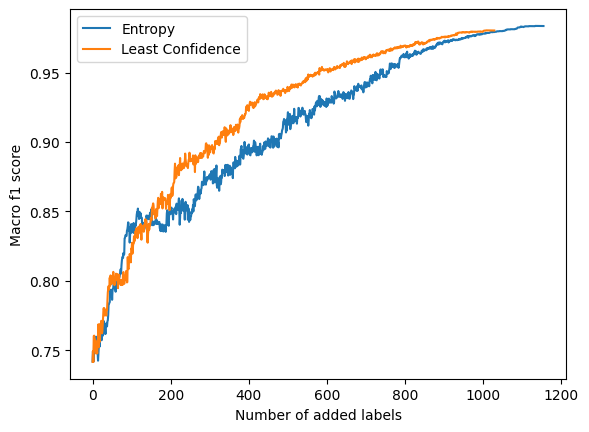

In [65]:
print("Entropy macro f1 score: ", entropy_macro_f1[-1])
print("Least confidence macro f1 score: ", least_confidence_macro_f1[-1])

# plot macro f1 score
plt.plot(entropy_macro_f1, label='Entropy')
plt.plot(least_confidence_macro_f1, label='Least Confidence')
plt.xlabel('Number of added labels')
plt.ylabel('Macro f1 score')
plt.legend()
plt.show()

In [66]:
# predict probabilities for test set
y_pred = entropy_model.predict(X_test)
print(y_pred)

# f1 macro score
score = f1_score(y_test_categorical, y_pred, average='macro')
print("Test F1 Macro Score:",score)

#classification report
print(classification_report(y_test_categorical, y_pred))

[4 4 5 ... 2 5 4]
Test F1 Macro Score: 0.9109187133951604
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       449
           1       0.81      0.81      0.81        27
           2       0.87      0.96      0.91        93
           3       0.93      0.88      0.90       377
           4       0.93      0.97      0.95       529
           5       0.97      0.89      0.93       363

    accuracy                           0.93      1838
   macro avg       0.91      0.91      0.91      1838
weighted avg       0.94      0.93      0.93      1838

